# ニューラルネットワークの学習

### 損失関数

* 2乗和誤差

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

In [3]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [4]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.097500000000000031

In [5]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.59750000000000003

* 交差エントロピー誤差

In [6]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [7]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [8]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.51082545709933802

In [9]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.3025840929945458

* ミニバッチ学習

In [10]:
#import sys, os
#sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [11]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [12]:
x_train.shape

(60000, 784)

In [13]:
t_train.shape

(60000, 10)

In [14]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)

In [15]:
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [16]:
# 解説
np.random.choice(60000, 10)

array([20199, 22854,  8402,  4132,  4255, 57506, 51305, 20128, 36543, 32127])

In [17]:
###

* [バッチ対応版] 交差エントロピー誤差の実装

In [18]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y+1e-7)) / batch_size

In [19]:
cross_entropy_error(np.array(y), np.array(t))

2.3025840929945458

In [20]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

In [21]:
cross_entropy_error(np.array(y), np.array(2))

2.3025850929940455

### 数値微分

* 微分

In [22]:
# 悪い実装例
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h

In [23]:
np.float32(1e-50)

0.0

In [24]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001 
    return (f(x + h) - f(x - h)) / (2 * h)

* 数値微分の例

In [25]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

In [26]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

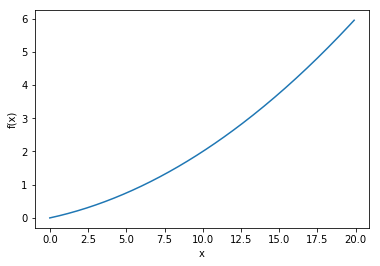

In [27]:
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [28]:
numerical_diff(function_1, 5)

0.1999999999990898

In [29]:
numerical_diff(function_1, 10)

0.2999999999986347

0.1999999999990898


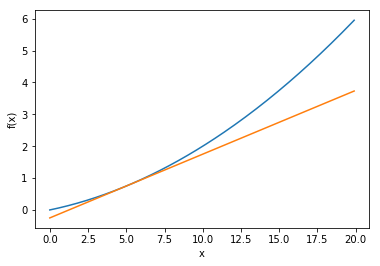

In [30]:
# %load sample/ch04/gradient_1d.py
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()


0.2999999999986347


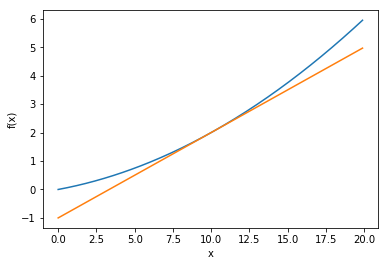

In [31]:
# %load sample/ch04/gradient_1d.py
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 10)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()


* 偏微分

In [32]:
def function_2(x):
    return np.sum(x ** 2)

In [33]:
def function_tmp1(x0):
    return x0 ** 2 + 4.0 ** 2.0

In [34]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [35]:
def function_tmp2(x1):
    return 3.0 ** 2 + x1 ** 2.0

In [36]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

### 勾配

In [37]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val

    return grad        

In [38]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([ 6.,  8.])

In [39]:
numerical_gradient(function_2, np.array([0.0, 4.0]))

array([ 0.,  8.])

In [40]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([ 6.,  0.])

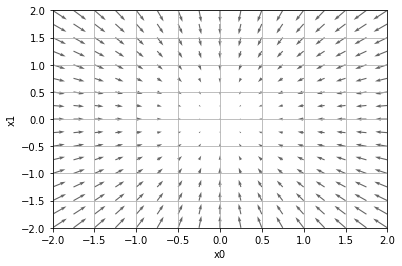

In [41]:
# %load sample/ch04/gradient_2d.py
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

* 勾配法

In [42]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x

In [43]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([ -6.11110793e-10,   8.14814391e-10])

In [44]:
# 学習率が大きすぎる
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([ -2.58983747e+13,  -1.29524862e+12])

In [45]:
# 学習率が小さすぎる
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

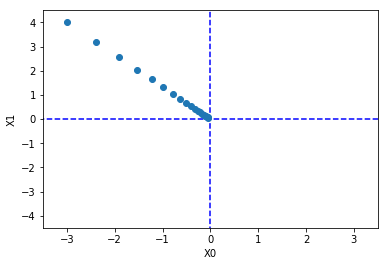

In [46]:
# %load sample/ch04/gradient_method.py
import numpy as np
import matplotlib.pylab as plt
#from gradient_2d import numerical_gradient
from sample.ch04.gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


* ニューラルネットワークに対する勾配

In [47]:
# %load sample/ch04/gradient_simplenet.py
#import sys, os
#sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss
    
    """
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)
    """

In [48]:
net = simpleNet()
net.W

array([[-1.31012996, -2.00187727, -0.69730943],
       [ 2.25623747, -0.15983877,  0.97081485]])

In [49]:
x = np.array([0.6, 0.9])
p = net.predict(x)
p

array([ 1.24453575, -1.34498126,  0.45534771])

In [50]:
np.argmax(p)

0

In [51]:
t = np.array([0, 0, 1])
net.loss(x, t)

1.2139783598034035

In [52]:
def f(W):
    return net.loss(x, t)

In [53]:
dW = numerical_gradient(f, net.W)
dW

array([[ 0.39234413,  0.02944789, -0.42179202],
       [ 0.58851619,  0.04417184, -0.63268803]])

In [54]:
# lambdaによる記述
f = lambda W: net.loss(x, t)
dW = numerical_gradient(f, net.W)
dW

array([[ 0.39234413,  0.02944789, -0.42179202],
       [ 0.58851619,  0.04417184, -0.63268803]])

In [55]:
###

### 学習アルゴリズムの実装

In [56]:
# %load sample/ch04/two_layer_net.py
#import sys, os
#sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

    """
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads
    """

In [57]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

In [58]:
net.params["W1"].shape

(784, 100)

In [59]:
net.params["b1"].shape

(100,)

In [60]:
net.params["W2"].shape

(100, 10)

In [61]:
net.params["b2"].shape

(10,)

In [62]:
x = np.random.rand(100, 784)
y = net.predict(x)
y

array([[ 0.09913465,  0.10806256,  0.09959586,  0.09156199,  0.10576771,
         0.0969572 ,  0.10331592,  0.09698935,  0.09652027,  0.1020945 ],
       [ 0.09922041,  0.1079727 ,  0.09958308,  0.09160656,  0.10554158,
         0.09696936,  0.10337112,  0.09685594,  0.09632667,  0.10255257],
       [ 0.09877408,  0.10765975,  0.09948051,  0.09171135,  0.10555477,
         0.09710339,  0.10326112,  0.09718798,  0.09657421,  0.10269284],
       [ 0.09932961,  0.10779716,  0.09947937,  0.09176911,  0.1052695 ,
         0.09702155,  0.10346059,  0.09709135,  0.09627386,  0.10250791],
       [ 0.09883553,  0.10770427,  0.09957123,  0.09188395,  0.10571681,
         0.09713726,  0.10352531,  0.0968111 ,  0.09635305,  0.1024615 ],
       [ 0.0993429 ,  0.10767164,  0.09979211,  0.0916089 ,  0.10586473,
         0.09697691,  0.10327368,  0.09678148,  0.09625634,  0.1024313 ],
       [ 0.09887199,  0.10786625,  0.09985797,  0.09183151,  0.10561864,
         0.09708529,  0.1032981 ,  0.09711956

In [63]:
t = np.random.rand(100, 10)
grads = net.numerical_gradient(x, t)

In [64]:
grads["W1"].shape

(784, 100)

In [65]:
grads["b1"].shape

(100,)

In [66]:
grads["W2"].shape

(100, 10)

In [67]:
grads["b2"].shape

(10,)

* ミニバッチ学習の実装

In [68]:
# %load sample/ch04/train_neuralnet.py
#import sys, os
#sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet
from sample.ch04.two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
#train_acc_list = []
#test_acc_list = []

#iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    """
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
    """

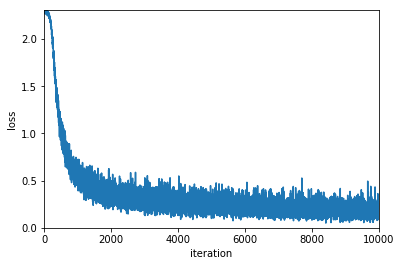

In [69]:
plt.plot(range(iters_num), train_loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.xlim(0, iters_num)
plt.ylim(0, np.max(train_loss_list))
plt.show()

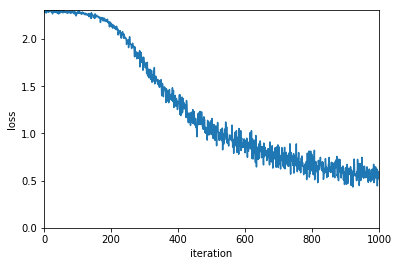

In [70]:
# 拡大
plt.plot(range(1000), train_loss_list[:1000])
plt.xlabel("iteration")
plt.ylabel("loss")
plt.xlim(0, 1000)
plt.ylim(0, np.max(train_loss_list))
plt.show()

* テストデータで評価

train acc, test acc | 0.09035, 0.0892
train acc, test acc | 0.79315, 0.7972
train acc, test acc | 0.8768, 0.8817
train acc, test acc | 0.898316666667, 0.9009
train acc, test acc | 0.908033333333, 0.9099
train acc, test acc | 0.914633333333, 0.9159
train acc, test acc | 0.9197, 0.9208
train acc, test acc | 0.923683333333, 0.9259
train acc, test acc | 0.927616666667, 0.9281
train acc, test acc | 0.930983333333, 0.9303
train acc, test acc | 0.933733333333, 0.9349
train acc, test acc | 0.9374, 0.9373
train acc, test acc | 0.939316666667, 0.9394
train acc, test acc | 0.9417, 0.9408
train acc, test acc | 0.94315, 0.9422
train acc, test acc | 0.945333333333, 0.9441
train acc, test acc | 0.9474, 0.9461


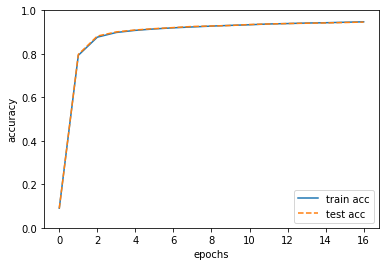

In [71]:
# %load sample/ch04/train_neuralnet.py
#import sys, os
#sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet
from sample.ch04.two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()